## Double pendulum

ODE is quite complicated.  Difficult to derive by hands, easy to make typos. 

Have the computer derive the ODE. 

We will use Lagrangian mechanics: coordinate-independent way to writing the ODEs of Newtonian mechanics.  In mathematics the closest subject would be called "Differential Geometry". 

$$ L = T - V $$

$L$ is called the *Lagrangian*.  $T$ kinetic energy, $V$ potential energy. 

$$-\frac{\partial L}{\partial \theta_i} + \frac{\partial R}{\partial w_i} + \frac{\partial^2 L}{\partial t \partial w_i} = 0 \ \ \ i = 1, 2$$


$w_i = \theta_i'$, i.e. $w_i = \frac{\partial \theta_i}{\partial t}$. 

$R$ *Rayeleigh dissipation term* this is our term that deals with friction. 


In [1]:
import sympy as sp

m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
## theta_i we give symbol ti
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)

ti = sp.Function("θ_i")(t)
wi = sp.Derivative(ti, t)

R = sp.Function("R")
L = sp.Function("L")

T, V = sp.symbols("T V")

In [2]:
Teq = sp.Eq(T, (1/2)*m1*r1**2*w1**2 + \
            m2*r1*r2*w1*w2*sp.cos(t1-t2)+ \
            (1/2)*m2*r1**2*w1**2+ \
            (1/2)*m2*r2**2*w2**2)
## we forgot the 3rd term in class!
sp.pprint(Teq)

                          2                         2                         
             2 ⎛d        ⎞             2 ⎛d        ⎞                          
T = 0.5⋅m₁⋅r₁ ⋅⎜──(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ
               ⎝dt       ⎠               ⎝dt       ⎠                          

                                                  2
      d         d                    2 ⎛d        ⎞ 
₂(t))⋅──(θ₁(t))⋅──(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
      dt        dt                     ⎝dt       ⎠ 


In [3]:
Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1) - \
            m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
sp.pprint(Veq)

V = -g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t)))


In [4]:
## lagrangian

Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
print("Lagrangian")
sp.pprint(Leq)

Lagrangian
                                                                              
                                                                         2 ⎛d 
L = g⋅m₁⋅r₁⋅cos(θ₁(t)) + g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅r₁ ⋅⎜──
                                                                           ⎝dt

        2                         2                                           
       ⎞             2 ⎛d        ⎞                                d         d 
(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ₂(t))⋅──(θ₁(t))⋅──
       ⎠               ⎝dt       ⎠                                dt        dt

                                2
                   2 ⎛d        ⎞ 
(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
                     ⎝dt       ⎠ 


In [5]:
Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)
sp.pprint(Req)

                      2                                   2
           ⎛d        ⎞           ⎛  d           d        ⎞ 
R = 0.5⋅k₁⋅⎜──(θ₁(t))⎟  + 0.5⋅k₂⋅⎜- ──(θ₁(t)) + ──(θ₂(t))⎟ 
           ⎝dt       ⎠           ⎝  dt          dt       ⎠ 


## Lagrange equations of motion
$$-\frac{\partial L}{\partial \theta_i} + \frac{\partial R}{\partial w_i} + \frac{\partial^2 L}{\partial t \partial w_i} = 0 \ \ \ i = 1, 2$$

In [6]:
## i = 1
LEM1 = (-sp.Derivative(Leq.args[1], t1) +\
        sp.Derivative(Req.args[1], w1) + sp.Derivative(Leq.args[1], w1, t)).doit().simplify()
LEM2 = (-sp.Derivative(Leq.args[1], t2) +\
        sp.Derivative(Req.args[1], w2) + sp.Derivative(Leq.args[1], w2, t)).doit().simplify()

In [7]:
sp.pprint(LEM1)

                                                                              
                                                         d                  d 
1.0⋅g⋅m₁⋅r₁⋅sin(θ₁(t)) + 1.0⋅g⋅m₂⋅r₁⋅sin(θ₁(t)) + 1.0⋅k₁⋅──(θ₁(t)) + 1.0⋅k₂⋅──
                                                         dt                 dt
                                                                              

                                          2                       2           
                 d                    2  d                    2  d            
(θ₁(t)) - 1.0⋅k₂⋅──(θ₂(t)) + 1.0⋅m₁⋅r₁ ⋅───(θ₁(t)) + 1.0⋅m₂⋅r₁ ⋅───(θ₁(t)) + 1
                 dt                       2                       2           
                                        dt                      dt            

                                          2                                   
                               ⎛d        ⎞                                    
.0⋅m₂⋅r₁⋅r₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₂(t))⎟  + 1.0⋅

In [8]:
sp.pprint(LEM2)

                                                                              
                                d                  d                          
1.0⋅g⋅m₂⋅r₂⋅sin(θ₂(t)) - 1.0⋅k₂⋅──(θ₁(t)) + 1.0⋅k₂⋅──(θ₂(t)) - 1.0⋅m₂⋅r₁⋅r₂⋅si
                                dt                 dt                         
                                                                              

                            2                                     2           
                 ⎛d        ⎞                                     d            
n(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟  + 1.0⋅m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ₂(t))⋅───(θ₁(t)) + 1
                 ⎝dt       ⎠                                      2           
                                                                dt            

            2       
        2  d        
.0⋅m₂⋅r₂ ⋅───(θ₂(t))
            2       
          dt        


In [9]:
## solve for theta_1'' and theta_2''
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))
sp.pprint(SOL)

⎧                 ⎛                                                           
⎪                 ⎜                        d              d                   
⎪  2         - r₁⋅⎜g⋅m₂⋅r₂⋅sin(θ₂(t)) - k₂⋅──(θ₁(t)) + k₂⋅──(θ₂(t)) - m₂⋅r₁⋅r₂
⎨ d               ⎝                        dt             dt                  
⎪───(θ₁(t)): ─────────────────────────────────────────────────────────────────
⎪  2                                                                          
⎩dt                                                                           

                               2⎞                         ⎛                   
                    ⎛d        ⎞ ⎟                         ⎜                   
⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟ ⎟⋅cos(θ₁(t) - θ₂(t)) + r₂⋅⎜g⋅m₁⋅r₁⋅sin(θ₁(t)) 
                    ⎝dt       ⎠ ⎠                         ⎝                   
──────────────────────────────────────────────────────────────────────────────
                                          2    ⎛   

In [10]:
T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()

In [11]:
## As a test to see if these ODEs have no mistakes
##  dE/dt = -2R

test=sp.Derivative(Teq.args[1]+Veq.args[1], t).doit().simplify()
test=test.xreplace({sp.Derivative(t1,t,2): T1pp, sp.Derivative(t2,t,2): T2pp})
test = test.simplify()
sp.pprint( (test + 2*Req.args[1]).simplify() )

0


In [12]:
## We want to make this into a callable function of theta_1, theta_2, theta_1', theta_2'
## and we want it to be reasonably fast. 

## technique 1: subst and evalf() very slow
## technique 2: lambdify in sympy
## technique 3 (new): is called ufuncify  -- we will use this. 

## first step is to replace all occurences of theta_1(t) as fcn of time with dummy variable
## similarly replace theta_1'(t) with dummy variable

w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})
xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})

In [13]:
sp.pprint(xT2pp)

      ⎛                                                                       
m₂⋅r₂⋅⎝g⋅m₁⋅r₁⋅sin(t₁) + g⋅m₂⋅r₁⋅sin(t₁) + k₁⋅w₁ + k₂⋅w₁ - k₂⋅w₂ + m₂⋅r₁⋅r₂⋅w₂
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                         m₂⋅r₁

2             ⎞                             ⎛                                 
 ⋅sin(t₁ - t₂)⎠⋅cos(t₁ - t₂) - r₁⋅(m₁ + m₂)⋅⎝g⋅m₂⋅r₂⋅sin(t₂) - k₂⋅w₁ + k₂⋅w₂ -
──────────────────────────────────────────────────────────────────────────────
   2 ⎛           2              ⎞                                             
⋅r₂ ⋅⎝m₁ - m₂⋅cos (t₁ - t₂) + m₂⎠                                             

            2             ⎞
 m₂⋅r₁⋅r₂⋅w₁ ⋅sin(t₁ - t₂)⎠
───────────────────────────
                           
                           


In [14]:
## let's make it callable
## t1pp will be a callable function and you give it arguments
## r1 -- distance from the first bearing to the 2nd -- 1st arm length
## r2 -- distance from 2nd bearing to end of pendulum -- 2nd arm length

from sympy.utilities.autowrap import ufuncify
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

## TH = (theta1, theta2, theta1', theta2')

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

In [15]:
## okay, we have realistic-looking solutions. 

X = theODE([1.0, 1.0, 0.0, 0.0], 0.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 10.0)
print(X)


[0.0, 0.0, -8.414709848078965, 0.0]


<IPython.core.display.Javascript object>


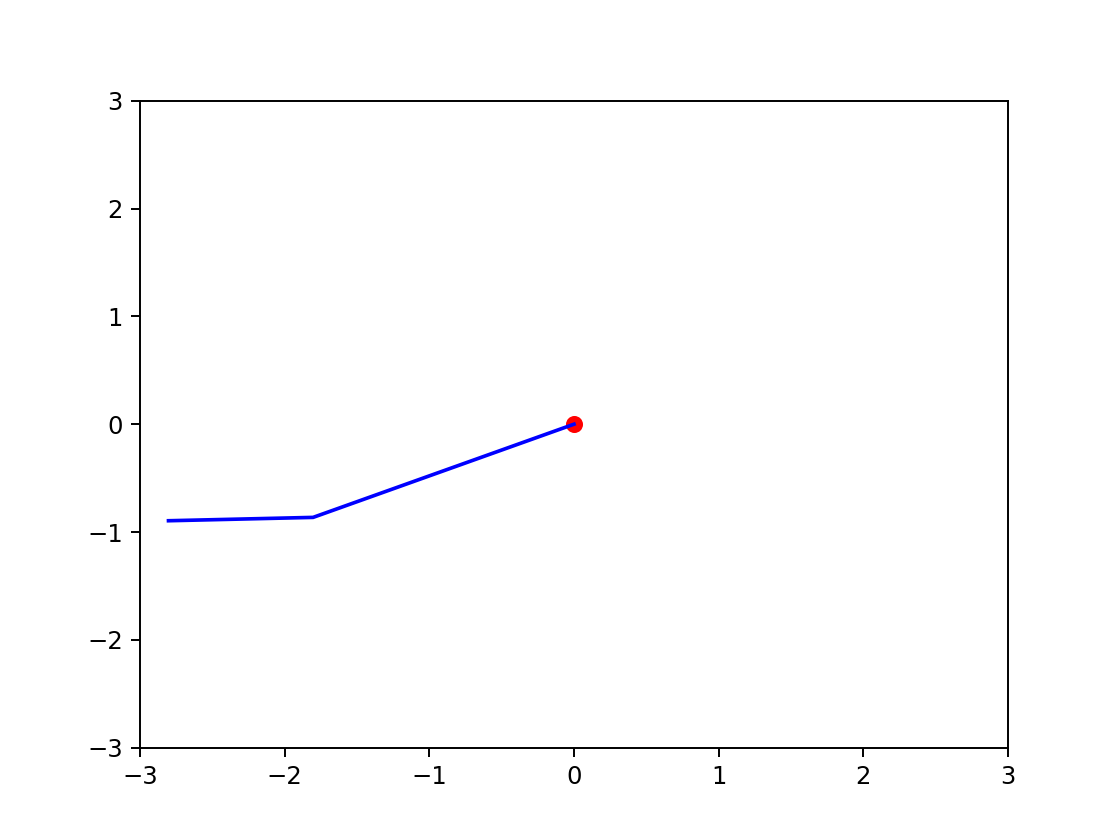

In [28]:
## make a dynamic plot -- an animated plot that looks like a double pendulum in motion
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy.integrate import odeint

%matplotlib nbagg  
##matplotlib notebook

## our grab of the single pendulum animation from Dynamic.plots.1
## let's modify it. 
fig, ax = plt.subplots()
## arm lengths
R1 = 2.0
R2 = 1.0

cent = plt.plot([0.0], [0.0], 'ro')
ax.set_xlim(-(R1+R2), R1+R2)
ax.set_ylim(-(R1+R2), R1+R2)

## set up arm initial state
## [theta1, theta2, theta1', theta2']
TS = [0.0, 0.0, 7.0, 0.0]
TSA = [TS] ## array of states

def armvecx(TS):
    return [0.0, R1*np.sin(TS[0]), R1*np.sin(TS[0])+R2*np.sin(TS[1])]
def armvecy(TS):
    return [0.0, -R1*np.cos(TS[0]), -R1*np.cos(TS[0])-R2*np.cos(TS[1])]

arm, = plt.plot(armvecx(TS), armvecy(TS), 'b')

dt = 0.002

def init():
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    return arm, 

def animate(i):
    ## asking the ODE code to do just one step
    #def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):

    SOL = odeint(theODE, TSA[-1], [0.0, dt], args=(R1, R2, 1.0, 1.0, 0.01, 0.01, 10.0))
    TSA.append(SOL[-1])
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    return arm,
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )

plt.show()

In [32]:
## let's write some checks to see how accurate this simulation is
## let's set the friction to zero, and check to see if the system's total 
## energy is constant. 
## for non-zero friction we could check to see energy is lost according to the Raleigh term

Etot = Teq.args[1]+Veq.args[1]
sp.pprint(Etot)
## we need to make this into a callable function so we need to call ufuncify 
Etot = Etot.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})

Etot = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], Etot)
Etot(1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 1.0, 1.0, 10.0, -2.0, 10.0)

                                                                              
                                                                      2 ⎛d    
-g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅r₁ ⋅⎜──(θ₁
                                                                        ⎝dt   

     2                         2                                              
    ⎞             2 ⎛d        ⎞                                d         d    
(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ₂(t))⋅──(θ₁(t))⋅──(θ₂
    ⎠               ⎝dt       ⎠                                dt        dt   

                             2
                2 ⎛d        ⎞ 
(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
                  ⎝dt       ⎠ 


65.7909308239558

<IPython.core.display.Javascript object>


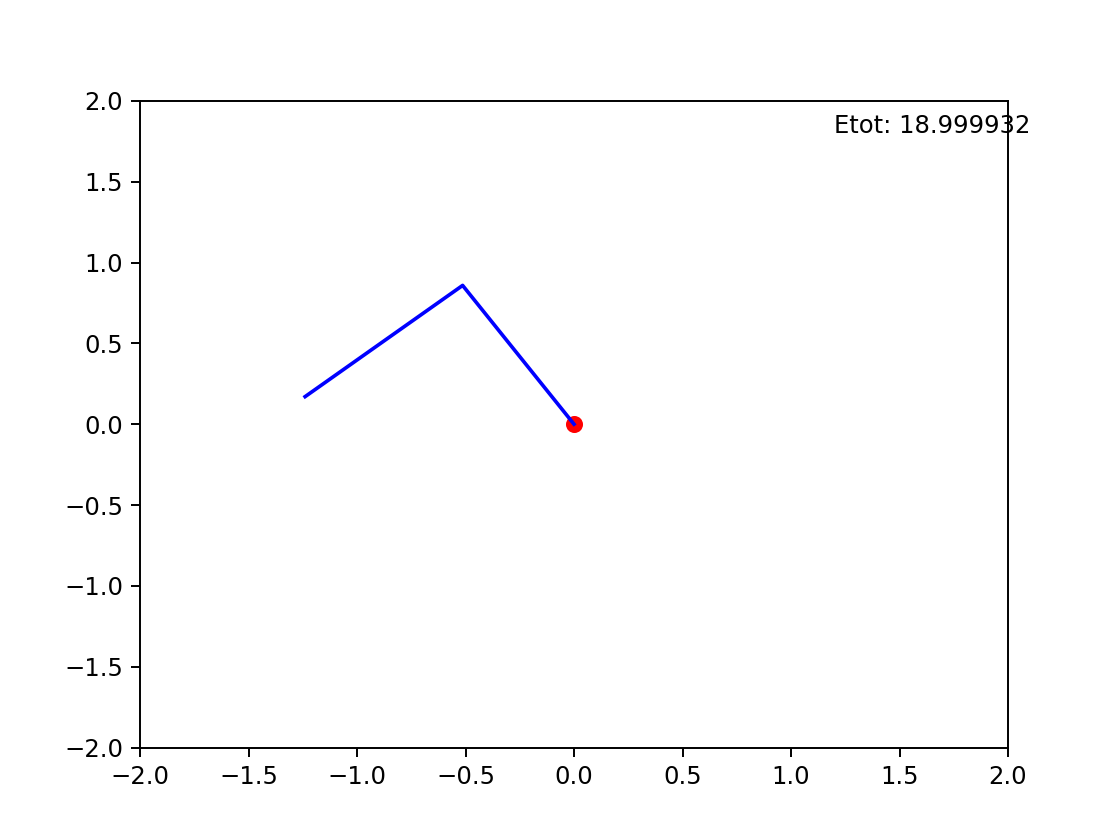

In [40]:
## our grab of the single pendulum animation from Dynamic.plots.1
## let's modify it. 
fig, ax = plt.subplots()
## arm lengths
R1 = 1.0
R2 = 1.0

cent = plt.plot([0.0], [0.0], 'ro')
ax.set_xlim(-(R1+R2), R1+R2)
ax.set_ylim(-(R1+R2), R1+R2)

## set up arm initial state
## [theta1, theta2, theta1', theta2']
TS = [0.0, 0.0, 7.0, 0.0]
TSA = [TS] ## array of states

def armvecx(TS):
    return [0.0, R1*np.sin(TS[0]), R1*np.sin(TS[0])+R2*np.sin(TS[1])]
def armvecy(TS):
    return [0.0, -R1*np.cos(TS[0]), -R1*np.cos(TS[0])-R2*np.cos(TS[1])]

arm, = plt.plot(armvecx(TS), armvecy(TS), 'b')
etot = plt.text(0.6*(R1+R2), 0.9*(R1+R2), 'Etot: ')

dt = 0.001

def init():
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    return arm, 

def animate(i):
    ## asking the ODE code to do just one step
    #def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):

    SOL = odeint(theODE, TSA[-1], [0.0, dt], args=(R1, R2, 1.0, 1.0, 0.0, 0.0, 10.0))
    TSA.append(SOL[-1])
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    etot.set_text("Etot: %6.6f" % Etot(R1, R2, 1.0, 1.0, 0.0, 0.0, \
                                      TSA[-1][0], TSA[-1][1], TSA[-1][2], TSA[-1][3], 10.0 ))
    return arm,
    #Etot = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], Etot)

## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )

plt.show()